# Machine Learning Experiments

This notebook records ouputs during training models.

In [1]:
# system imports
import os
from termcolor import colored

# data manipulation and data clean
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# data pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# self-defined
from document import document 
import pipeline

# default data path
DATA_PATH = '../data'
GLOVE_PATH = '../glove.6B'
TRAIN_DIR = os.path.join(DATA_PATH, "train")
TEST_DIR = os.path.join(DATA_PATH, "test")

Using TensorFlow backend.


In [2]:
# default parameters
stop_words = stopwords.words('english')
stop_words = stop_words + ['would','could','may','also', 'one', 'two', 'three', 
                           'first', 'second' ,'third',
                           'someone', 'anyone', 'something', 'anything', 
                           'subject', 'organization', 'lines',
                           'article', 'writes', 'wrote']
tokenize_regex = r"\w+|\$[\d\.]+"

In [3]:
# load data
print (colored('Loading files into memory', 'green', attrs=['bold']))

train_path_list, ylabel_train = pipeline.parse_files(TRAIN_DIR)
test_path_list, ylabel_test = pipeline.parse_files(TEST_DIR)

train_documents = [pipeline.load_document(path = path, label = y) for \
                   path, y in zip(train_path_list, ylabel_train)]
test_documents = [pipeline.load_document(path = path, label = y) for \
                  path, y in zip(test_path_list, ylabel_test)]

# clean all documents
print (colored('Cleaning all files', 'green', attrs=['bold']))
pipeline.clean_all_documents(train_documents, 
                             word_split_regex = tokenize_regex,
                             stop_words = stop_words,
                             contraction_dict = 'default')
pipeline.clean_all_documents(test_documents,
                             word_split_regex = tokenize_regex,
                             stop_words = stop_words,
                             contraction_dict = 'default')


# encode labels
print (colored('Encoding labels', 'green', attrs=['bold']))
y_train, y_test, category = pipeline.label_encoder(ylabel_train, ylabel_test, 'ordinal')


# calculate the BOW representation
print (colored('Calculating BOW', 'green', attrs=['bold']))
X_train_bow = pipeline.BagOfWord.fit_transform(train_documents)
X_test_bow = pipeline.BagOfWord.transform(test_documents)
print ("The shape of X after processing is: \ntrain: %s, test: %s"%(X_train_bow.shape, X_test_bow.shape))

# calculate the tf-idf representation
print (colored('Calculating Tf-idf', 'green', attrs=['bold']))
X_train_tfidf = pipeline.Tfidf.fit_transform(train_documents)
X_test_tfidf = pipeline.Tfidf.transform(test_documents)
print ("The shape of X after processing is: \ntrain: %s, test: %s"%(X_train_tfidf.shape, X_test_tfidf.shape))

Loading files into memory
Body text from ../data/train/rec.autos/101675 is empty.
Body text from ../data/train/comp.sys.mac.hardware/51839 is empty.
Body text from ../data/train/comp.sys.mac.hardware/51541 is empty.
Body text from ../data/train/rec.sport.baseball/104518 is empty.
Body text from ../data/train/comp.os.ms-windows.misc/9972 is empty.
Body text from ../data/train/comp.os.ms-windows.misc/9813 is empty.
Body text from ../data/train/rec.sport.hockey/52654 is empty.
Body text from ../data/train/sci.med/59367 is empty.
Body text from ../data/train/rec.motorcycles/103233 is empty.
Body text from ../data/train/comp.windows.x/67032 is empty.
Body text from ../data/train/comp.graphics/37928 is empty.
Body text from ../data/train/comp.graphics/38234 is empty.
Body text from ../data/train/comp.sys.ibm.pc.hardware/60353 is empty.
Body text from ../data/train/comp.sys.ibm.pc.hardware/60360 is empty.
Body text from ../data/train/misc.forsale/74724 is empty.
Body text from ../data/train/m

In [4]:
from sklearn import preprocessing
scaler = preprocessing.Normalizer()
X_train_scaled = scaler.fit_transform(X_train_bow)     
X_test_scaled = scaler.transform(X_test_bow)

## Feature Visualization

### Normalized BOW

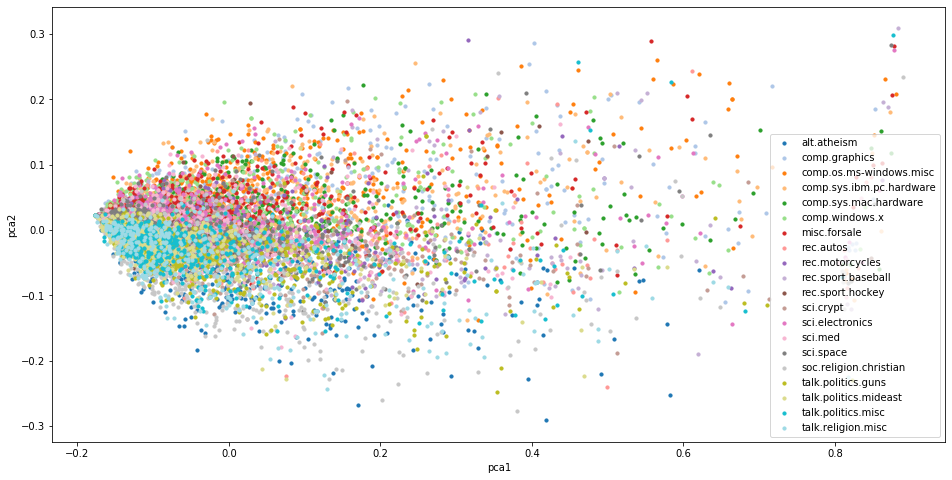

In [5]:
pipeline.plot_feature_pca(X_train_scaled, y_train, category)

### Tf-idf

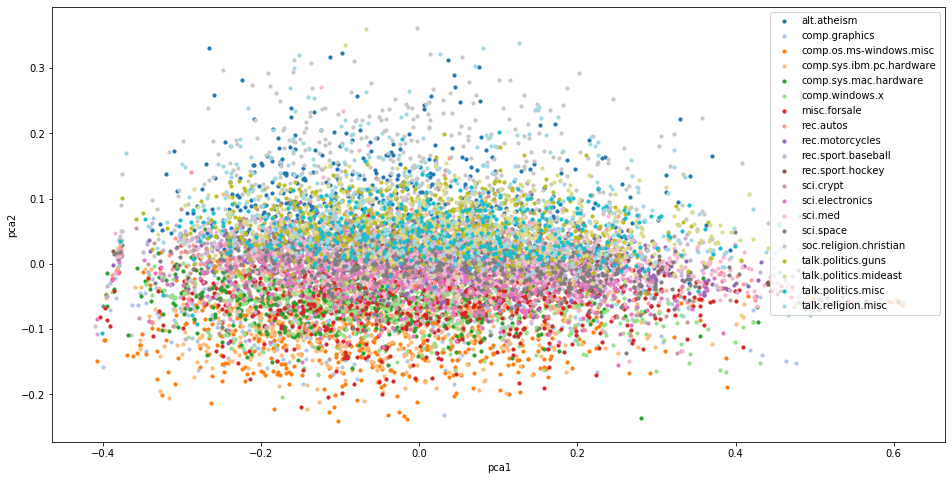

In [6]:
pipeline.plot_feature_pca(X_train_tfidf, y_train, category)

## Baseline: Naive Bayes

### Bag of word

test size is: 20%
Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.78      0.75      0.77        92
           comp.graphics       0.50      0.75      0.60        99
 comp.os.ms-windows.misc       0.55      0.13      0.20       135
comp.sys.ibm.pc.hardware       0.60      0.72      0.65       119
   comp.sys.mac.hardware       0.72      0.78      0.75       119
          comp.windows.x       0.69      0.85      0.76       123
            misc.forsale       0.68      0.78      0.72        96
               rec.autos       0.79      0.81      0.80       112
         rec.motorcycles       0.78      0.85      0.81       131
      rec.sport.baseball       0.84      0.92      0.88        99
        rec.sport.hockey       0.97      0.76      0.85        38
               sci.crypt       0.97      0.87      0.91       128
         sci.electronics       0.85      0.69      0.76       119
                 sci.med       0.8

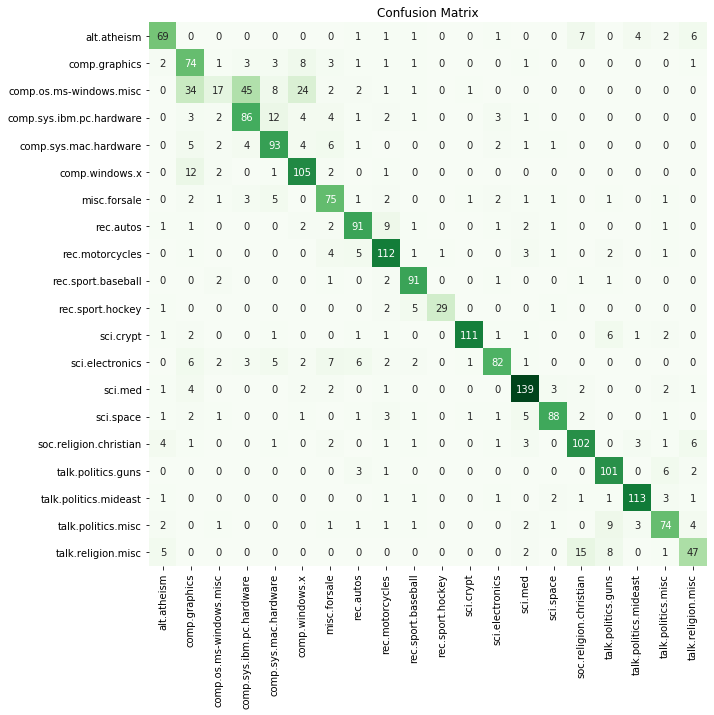

Train score (macro f1):0.8440, test score (macro f1):0.7577


In [24]:
clf = MultinomialNB()
f1 = pipeline.test_classifier(X_train_bow, y_train, clf, test_size=0.2, y_names=category, confusion=True)
print('Train score (macro f1):%.4f, test score (macro f1):%.4f'%(f1[1],f1[0]))

Testing classifier with train-test split
test size is: 20%
Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.84      0.28      0.42        92
           comp.graphics       0.60      0.62      0.61        99
 comp.os.ms-windows.misc       0.86      0.64      0.74       135
comp.sys.ibm.pc.hardware       0.71      0.65      0.68       119
   comp.sys.mac.hardware       0.81      0.62      0.70       119
          comp.windows.x       0.91      0.72      0.81       123
            misc.forsale       0.82      0.70      0.75        96
               rec.autos       0.86      0.60      0.71       112
         rec.motorcycles       0.98      0.47      0.64       131
      rec.sport.baseball       0.71      0.82      0.76        99
        rec.sport.hockey       0.00      0.00      0.00        38
               sci.crypt       0.93      0.76      0.84       128
         sci.electronics       0.95      0.35      0.52    

/Users/xchen/opt/anaconda3/envs/ds_37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


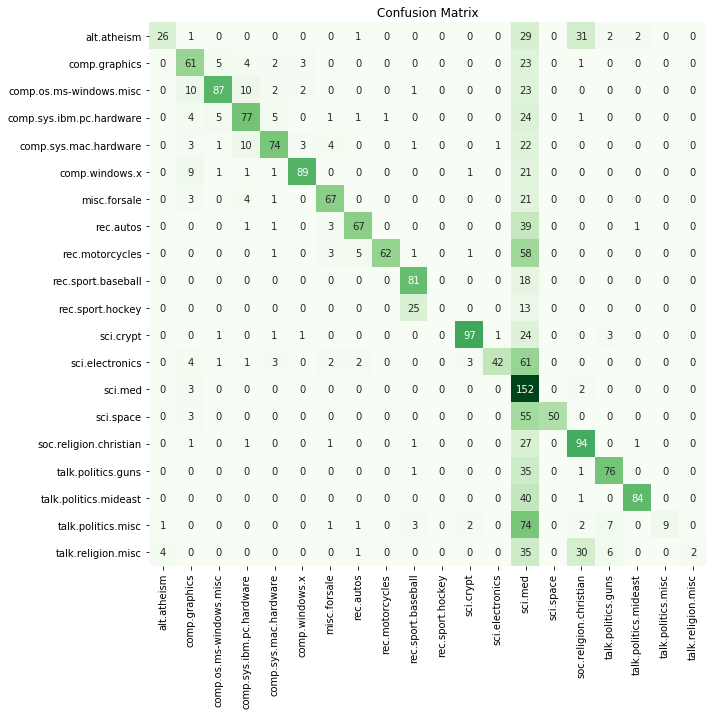

Train score (macro f1):0.6429, test score (macro f1):0.5752


In [15]:
# create default classifier
clf = MultinomialNB()

# test classifier with train-test-split
print (colored('Testing classifier with train-test split', 'magenta', attrs=['bold']))
f1 = pipeline.test_classifier(X_train_scaled, y_train, clf, test_size=0.2, y_names=category, confusion=True)
print('Train score (macro f1):%.4f, test score (macro f1):%.4f'%(f1[1],f1[0]))

In [13]:
scores = pipeline.cross_validation(X_train_bow, y_train, clf, n_jobs=-1, cv=5)

The average f1_macro score is 0.7586, standard deviation is 0.0141.


# Tf-idf

Testing classifier with train-test split
test size is: 20%
Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.75      0.58      0.65        92
           comp.graphics       0.61      0.76      0.68        99
 comp.os.ms-windows.misc       0.75      0.76      0.76       135
comp.sys.ibm.pc.hardware       0.75      0.70      0.72       119
   comp.sys.mac.hardware       0.84      0.73      0.78       119
          comp.windows.x       0.82      0.86      0.84       123
            misc.forsale       0.80      0.81      0.80        96
               rec.autos       0.86      0.81      0.83       112
         rec.motorcycles       0.90      0.85      0.87       131
      rec.sport.baseball       0.71      0.95      0.81        99
        rec.sport.hockey       1.00      0.16      0.27        38
               sci.crypt       0.98      0.90      0.94       128
         sci.electronics       0.88      0.78      0.83    

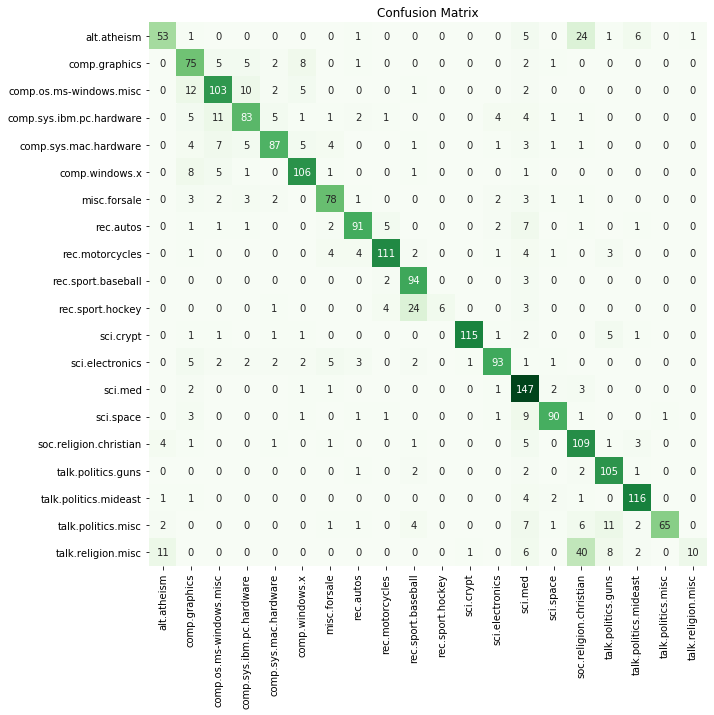

Train score (macro f1):0.8285, test score (macro f1):0.7442


In [16]:
# create default classifier
clf = MultinomialNB()

# test classifier with train-test-split
print (colored('Testing classifier with train-test split', 'magenta', attrs=['bold']))
f1 = pipeline.test_classifier(X_train_tfidf, y_train, clf, test_size=0.2, y_names=category, confusion=True)
print('Train score (macro f1):%.4f, test score (macro f1):%.4f'%(f1[1],f1[0]))

In [17]:
scores = pipeline.cross_validation(X_train_tfidf, y_train, clf, n_jobs=-1, cv=5)

The average f1_macro score is 0.7409, standard deviation is 0.0094.


## Logistic Regression + BOW

In [20]:
# create default classifier
clf = LogisticRegression(penalty='l2', C=1, solver ='liblinear', random_state=42)

# test classifier with train-test-split
print (colored('Testing classifier with train-test split', 'magenta', attrs=['bold']))
f1 = pipeline.test_classifier(X_train_bow, y_train, clf, test_size=0.2, y_names=category, confusion=False)

Testing classifier with train-test split
test size is: 20%
Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.82      0.77      0.79        92
           comp.graphics       0.61      0.74      0.67        99
 comp.os.ms-windows.misc       0.77      0.80      0.79       135
comp.sys.ibm.pc.hardware       0.73      0.69      0.71       119
   comp.sys.mac.hardware       0.75      0.76      0.76       119
          comp.windows.x       0.82      0.80      0.81       123
            misc.forsale       0.71      0.80      0.75        96
               rec.autos       0.82      0.80      0.81       112
         rec.motorcycles       0.89      0.84      0.87       131
      rec.sport.baseball       0.78      0.96      0.86        99
        rec.sport.hockey       1.00      0.71      0.83        38
               sci.crypt       0.92      0.85      0.88       128
         sci.electronics       0.79      0.74      0.77    

In [5]:
# cross-validation
print (colored('Running 5-fold cross validation', 'magenta', attrs=['bold']))

penalty = 'l1'
c=1
solver = 'liblinear'
print('penalty=%s, c=%d, solver=%s'%(penalty, c, solver))
clf = LogisticRegression(penalty=penalty, C=c, solver =solver, random_state=42)
scores = pipeline.cross_validation(X_train_bow, y_train, clf, n_jobs=-1)

penalty = 'l2'
c=1
solver = 'liblinear'
print('penalty=%s, c=%d, solver=%s'%(penalty, c, solver))
clf = LogisticRegression(penalty=penalty, C=c, solver =solver, random_state=42)
scores = pipeline.cross_validation(X_train_bow, y_train, clf, n_jobs=-1)

penalty = 'l2'
c=1
solver = 'lbfgs'
print('penalty=%s, c=%d, solver=%s'%(penalty, c, solver))
clf = LogisticRegression(penalty=penalty, C=c, solver =solver, random_state=42)
scores = pipeline.cross_validation(X_train_bow, y_train, clf, n_jobs=-1)

Running 5-fold cross validation
penalty=l1, c=1, solver=liblinear
The average f1_macro score is 0.7727, standard deviation is 0.0104.
penalty=l2, c=1, solver=liblinear
The average f1_macro score is 0.7991, standard deviation is 0.0094.
penalty=l2, c=1, solver=lbfgs
The average f1_macro score is 0.7241, standard deviation is 0.0152.


In [5]:
# parameter tuning
print (colored('Running grid search with 5-fold cross validation', 'magenta', attrs=['bold']))

param_grid={'C':[0.01, 0.1, 1, 2, 5, 10]}
clf = LogisticRegression(penalty='l2', solver ='liblinear', random_state=42)
scores, clf = pipeline.grid_search(X_train_bow, y_train, clf, param_grid, n_jobs = -1)
print(scores)

Running grid search with 5-fold cross validation
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   51.4s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   57.2s finished




The best parameter set is {'C': 0.1} with score 0.8003.
  param_C  mean_test_score  std_test_score  mean_train_score  std_train_score
0    0.01         0.764827        0.007452          0.865528         0.001758
1     0.1         0.800263        0.009113          0.964706         0.001218
2       1         0.799053        0.009416          0.995357         0.000219
3       2         0.792675        0.008132          0.996761         0.000301
4       5         0.788155        0.008271          0.997065         0.000277
5      10         0.784005        0.009065          0.997277         0.000387


In [7]:
param_grid={'C':np.arange(0.05,1,0.05)}
clf = LogisticRegression(penalty='l2', solver ='liblinear', random_state=42)
scores, clf = pipeline.grid_search(X_train_bow, y_train, clf, param_grid, n_jobs = -1)
print(scores)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:  3.0min finished




The best parameter set is {'C': 0.2} with score 0.8044.
   param_C  mean_test_score  std_test_score  mean_train_score  std_train_score
0     0.05         0.796770        0.006296          0.942615         0.001107
1      0.1         0.800263        0.009113          0.964706         0.001218
2     0.15         0.802963        0.011140          0.974436         0.000952
3      0.2         0.804448        0.011523          0.980047         0.001033
4     0.25         0.804334        0.012674          0.983182         0.000830
5      0.3         0.803806        0.013063          0.986009         0.000674
6     0.35         0.803486        0.013220          0.987604         0.000895
7      0.4         0.803884        0.012710          0.988744         0.000798
8     0.45         0.803739        0.011757          0.989989         0.000789
9      0.5         0.803804        0.011752          0.990993         0.000536
10    0.55         0.803257        0.010611          0.991958         0.0

In [21]:
#clf_lr_bow = clf
clf_lr_bow = LogisticRegression(penalty='l2', C=0.2, solver ='liblinear', random_state=42)

Testing classifier with train-test split
test size is: 40%
Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.73      0.78      0.75       179
           comp.graphics       0.62      0.71      0.66       226
 comp.os.ms-windows.misc       0.72      0.76      0.74       254
comp.sys.ibm.pc.hardware       0.69      0.67      0.68       234
   comp.sys.mac.hardware       0.80      0.70      0.75       254
          comp.windows.x       0.77      0.82      0.79       228
            misc.forsale       0.68      0.83      0.75       219
               rec.autos       0.82      0.79      0.81       238
         rec.motorcycles       0.88      0.84      0.86       230
      rec.sport.baseball       0.83      0.95      0.89       223
        rec.sport.hockey       0.96      0.58      0.72        74
               sci.crypt       0.94      0.85      0.89       240
         sci.electronics       0.74      0.73      0.73    

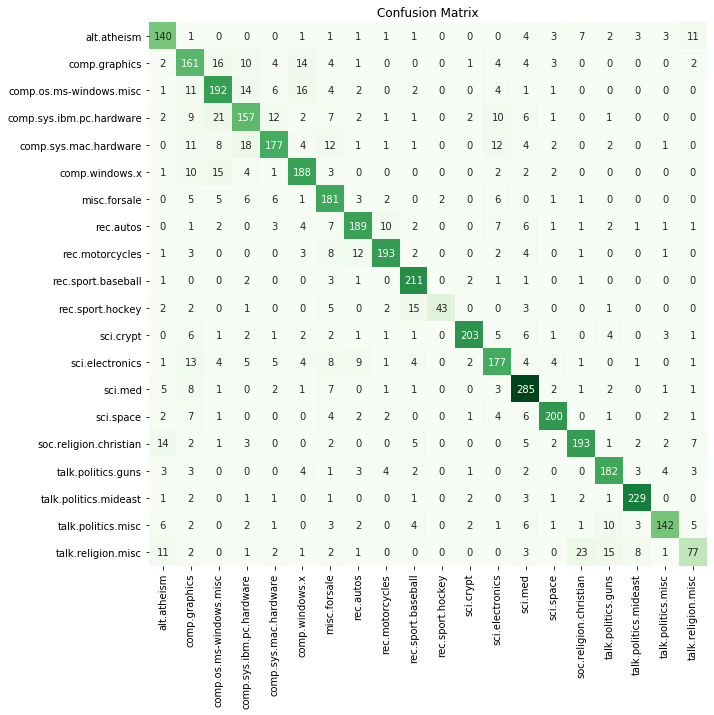

Train score (macro f1):0.9825, test score (macro f1):0.7861


In [22]:
# test classifier with train-test-split
clf_lr_bow = LogisticRegression(penalty='l2', C=0.2, solver ='liblinear', random_state=42)print (colored('Testing classifier with train-test split', 'magenta', attrs=['bold']))
f1 = pipeline.test_classifier(X_train_bow, y_train, clf_lr_bow, test_size=0.4, y_names=category, confusion=True)
print('Train score (macro f1):%.4f, test score (macro f1):%.4f'%(f1[1],f1[0]))

## Logistic Regression + Normalized BOW

In [24]:
# cross-validation
print (colored('Running 5-fold cross validation', 'magenta', attrs=['bold']))

c=25

penalty = 'l2'
solver = 'lbfgs'
print('penalty=%s, c=%d, solver=%s'%(penalty, c, solver))
clf = LogisticRegression(penalty=penalty, C=c, solver =solver, random_state=42)
scores = pipeline.cross_validation(X_train_scaled, y_train, clf, n_jobs=-1)

penalty = 'l2'
solver = 'liblinear'
print('penalty=%s, c=%d, solver=%s'%(penalty, c, solver))
clf = LogisticRegression(penalty=penalty, C=c, solver =solver, random_state=42)
scores = pipeline.cross_validation(X_train_scaled, y_train, clf, n_jobs=-1)

penalty = 'l1'
solver = 'liblinear'
print('penalty=%s, c=%d, solver=%s'%(penalty, c, solver))
clf = LogisticRegression(penalty=penalty, C=c, solver =solver, random_state=42)
scores = pipeline.cross_validation(X_train_scaled, y_train, clf, n_jobs=-1)

Running 5-fold cross validation
penalty=l2, c=25, solver=lbfgs
The average f1_macro score is 0.7893, standard deviation is 0.0080.
penalty=l2, c=25, solver=liblinear
The average f1_macro score is 0.7975, standard deviation is 0.0043.
penalty=l1, c=25, solver=liblinear
The average f1_macro score is 0.7808, standard deviation is 0.0062.


In [6]:
# grid search
param_grid={'C':[1, 10,20,30, 40, 50, 60, 70, 80, 100]}
clf = LogisticRegression(penalty='l2', solver ='liblinear', random_state=42)
scores, clf = pipeline.grid_search(X_train_scaled, y_train, clf, param_grid, n_jobs = -1)
print(scores)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   30.3s finished




The best parameter set is {'C': 100} with score 0.8079.
  param_C  mean_test_score  std_test_score  mean_train_score  std_train_score
0       1         0.652620        0.004137          0.728226         0.004873
1      10         0.779597        0.006768          0.928668         0.001938
2      20         0.794527        0.006310          0.961951         0.001334
3      30         0.799682        0.003669          0.974308         0.001487
4      40         0.802644        0.004988          0.980533         0.001219
5      50         0.805759        0.006391          0.984564         0.000652
6      60         0.807251        0.006087          0.987020         0.000639
7      70         0.807399        0.006007          0.988926         0.000445
8      80         0.807727        0.007126          0.990030         0.000610
9     100         0.807879        0.007109          0.991751         0.000420


In [7]:
# grid search
param_grid={'C':[100,150,200,250]}
clf = LogisticRegression(penalty='l2', solver ='liblinear', random_state=42)
scores, clf = pipeline.grid_search(X_train_scaled, y_train, clf, param_grid, n_jobs = -1)
print(scores)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:   10.9s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   14.5s finished




The best parameter set is {'C': 150} with score 0.8093.
  param_C  mean_test_score  std_test_score  mean_train_score  std_train_score
0     100         0.807879        0.007109          0.991751         0.000420
1     150         0.809311        0.007949          0.994273         0.000363
2     200         0.807659        0.007967          0.995251         0.000360
3     250         0.808600        0.007879          0.995742         0.000366


In [10]:
# grid search
param_grid={'C':np.arange(100,200,20)}
clf = LogisticRegression(penalty='l2', solver ='liblinear', random_state=42)
scores, clf = pipeline.grid_search(X_train_scaled, y_train, clf, param_grid, n_jobs = -1)
print(scores)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   16.3s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   19.2s finished




The best parameter set is {'C': 160} with score 0.8091.
  param_C  mean_test_score  std_test_score  mean_train_score  std_train_score
0     100         0.807879        0.007109          0.991751         0.000420
1     120         0.808426        0.008390          0.992968         0.000508
2     140         0.809066        0.007906          0.993886         0.000481
3     160         0.809127        0.007852          0.994520         0.000349
4     180         0.808430        0.007233          0.995043         0.000414


Testing classifier with train-test split
test size is: 20%
Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.78      0.79      0.79        92
           comp.graphics       0.61      0.72      0.66        99
 comp.os.ms-windows.misc       0.77      0.79      0.78       135
comp.sys.ibm.pc.hardware       0.75      0.69      0.72       119
   comp.sys.mac.hardware       0.78      0.76      0.77       119
          comp.windows.x       0.78      0.81      0.80       123
            misc.forsale       0.72      0.82      0.77        96
               rec.autos       0.84      0.80      0.82       112
         rec.motorcycles       0.87      0.85      0.86       131
      rec.sport.baseball       0.76      0.98      0.85        99
        rec.sport.hockey       1.00      0.66      0.79        38
               sci.crypt       0.94      0.85      0.89       128
         sci.electronics       0.77      0.72      0.74    

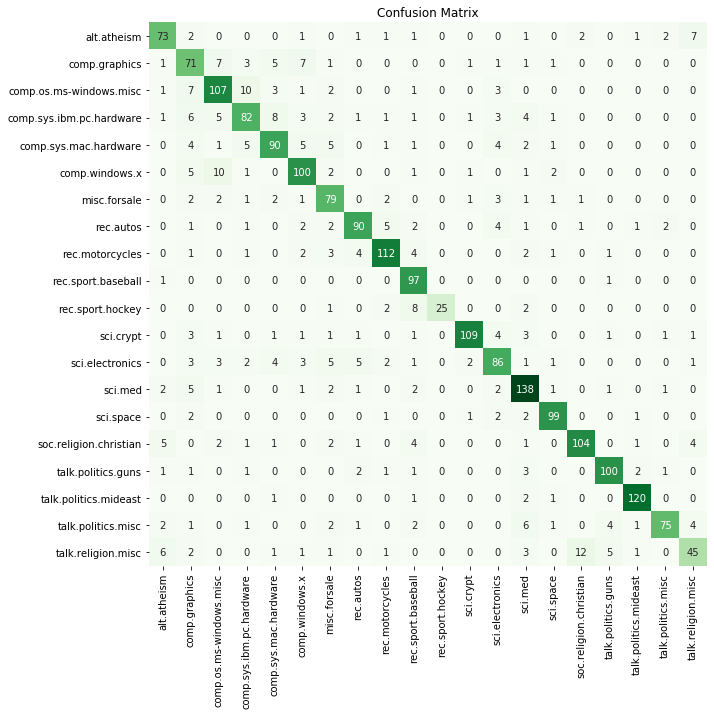

Train score (macro f1):0.9787, test score (macro f1):0.8069


In [23]:
clf_lr_bow_ = LogisticRegression(penalty='l2', C=160, solver ='liblinear', random_state=42)
print (colored('Testing classifier with train-test split', 'magenta', attrs=['bold']))
f1 = pipeline.test_classifier(X_train_bow, y_train, clf_lr_bow, test_size=0.2, y_names=category, confusion=True)
print('Train score (macro f1):%.4f, test score (macro f1):%.4f'%(f1[1],f1[0]))

## Logistic Regression + Tf-idf

In [6]:
clf = LogisticRegression(penalty='l2', C=1, solver ='liblinear', random_state=42)
# test classifier with train-test-split
print (colored('Testing logistic regression classifier with train-test split', 'magenta', attrs=['bold']))
f1_lr = pipeline.test_classifier(X_train_tfidf, y_train, clf, test_size=0.4, y_names=category, confusion=False)

Testing logistic regression classifier with train-test split
test size is: 40%
Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.76      0.75      0.76       179
           comp.graphics       0.63      0.71      0.67       226
 comp.os.ms-windows.misc       0.74      0.72      0.73       254
comp.sys.ibm.pc.hardware       0.73      0.69      0.71       234
   comp.sys.mac.hardware       0.77      0.67      0.71       254
          comp.windows.x       0.79      0.83      0.81       228
            misc.forsale       0.72      0.82      0.77       219
               rec.autos       0.85      0.81      0.83       238
         rec.motorcycles       0.90      0.85      0.88       230
      rec.sport.baseball       0.79      0.93      0.86       223
        rec.sport.hockey       1.00      0.39      0.56        74
               sci.crypt       0.95      0.83      0.89       240
         sci.electronics       0.77    

In [13]:
# cross-validation
print (colored('Running 10-fold cross validation', 'magenta', attrs=['bold']))

penalty = 'l1'
c=1
solver = 'liblinear'
print('penalty=%s, c=%d, solver=%s'%(penalty, c, solver))
clf = LogisticRegression(penalty=penalty, C=c, solver =solver, random_state=32)
scores = pipeline.cross_validation(X_train_tfidf, y_train, clf, n_jobs=-1, cv=10)

penalty = 'l2'
c=1
solver = 'liblinear'
print('penalty=%s, c=%d, solver=%s'%(penalty, c, solver))
clf = LogisticRegression(penalty=penalty, C=c, solver =solver, random_state=32)
scores = pipeline.cross_validation(X_train_tfidf, y_train, clf, n_jobs=-1, cv=10)

penalty = 'l2'
c=1
solver = 'lbfgs'
print('penalty=%s, c=%d, solver=%s'%(penalty, c, solver))
clf = LogisticRegression(penalty=penalty, C=c, solver =solver, random_state=32)
scores = pipeline.cross_validation(X_train_tfidf, y_train, clf, n_jobs=-1, cv=10)

Running 10-fold cross validation
penalty=l1, c=1, solver=liblinear
The average f1_macro score is 0.7382, standard deviation is 0.0104.
penalty=l2, c=1, solver=liblinear
The average f1_macro score is 0.7964, standard deviation is 0.0106.
penalty=l2, c=1, solver=lbfgs
The average f1_macro score is 0.8026, standard deviation is 0.0100.


In [7]:
# grid search
param_grid={'C':[6,8,10,12,15,20]}
clf = LogisticRegression(penalty='l2', solver ='lbfgs', random_state=42)
scores, clf = pipeline.grid_search(X_train_tfidf, y_train, clf, param_grid, n_jobs = -1)
print(scores)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   25.2s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   25.4s finished




The best parameter set is {'C': 12} with score 0.8274.
  param_C  mean_test_score  std_test_score  mean_train_score  std_train_score
0       6         0.825744        0.007282          0.987930         0.000215
1       8         0.825356        0.008092          0.991298         0.000199
2      10         0.825562        0.009299          0.993604         0.000308
3      12         0.827438        0.009295          0.994589         0.000257
4      15         0.826075        0.008980          0.995542         0.000332
5      20         0.826408        0.009316          0.996405         0.000185


/Users/xchen/opt/anaconda3/envs/ds_37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [9]:
# grid search
param_grid={'C':np.arange(10,14.2,0.2)}
clf = LogisticRegression(penalty='l2', solver ='lbfgs', random_state=42)
scores, clf = pipeline.grid_search(X_train_tfidf, y_train, clf, param_grid, n_jobs = -1)
print(scores)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:  1.5min finished




The best parameter set is {'C': 11.999999999999993} with score 0.8274.
   param_C  mean_test_score  std_test_score  mean_train_score  std_train_score
0       10         0.825562        0.009299          0.993604         0.000308
1     10.2         0.826647        0.008824          0.993886         0.000366
2     10.4         0.826230        0.009604          0.993753         0.000099
3     10.6         0.826041        0.009290          0.993830         0.000240
4     10.8         0.826800        0.009416          0.994019         0.000300
5       11         0.826494        0.009272          0.994232         0.000392
6     11.2         0.826074        0.009189          0.994284         0.000298
7     11.4         0.827250        0.009839          0.994518         0.000312
8     11.6         0.827036        0.008994          0.994516         0.000434
9     11.8         0.826473        0.009734          0.994619         0.000339
10      12         0.827438        0.009295          0.994

/Users/xchen/opt/anaconda3/envs/ds_37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
#clr_lr_tfidf = clf
clr_lr_tfidf = LogisticRegression(penalty='l2', C=12, solver ='lbfgs', random_state=42)

Testing classifier with train-test split
test size is: 20%


/Users/xchen/opt/anaconda3/envs/ds_37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.82      0.80      0.81        92
           comp.graphics       0.65      0.75      0.69        99
 comp.os.ms-windows.misc       0.78      0.81      0.80       135
comp.sys.ibm.pc.hardware       0.79      0.74      0.76       119
   comp.sys.mac.hardware       0.86      0.80      0.83       119
          comp.windows.x       0.81      0.87      0.84       123
            misc.forsale       0.76      0.79      0.78        96
               rec.autos       0.86      0.84      0.85       112
         rec.motorcycles       0.90      0.86      0.88       131
      rec.sport.baseball       0.86      0.97      0.91        99
        rec.sport.hockey       1.00      0.71      0.83        38
               sci.crypt       0.99      0.87      0.92       128
         sci.electronics       0.79      0.79      0.79       119
                 sci.med       0.82      0.90      0

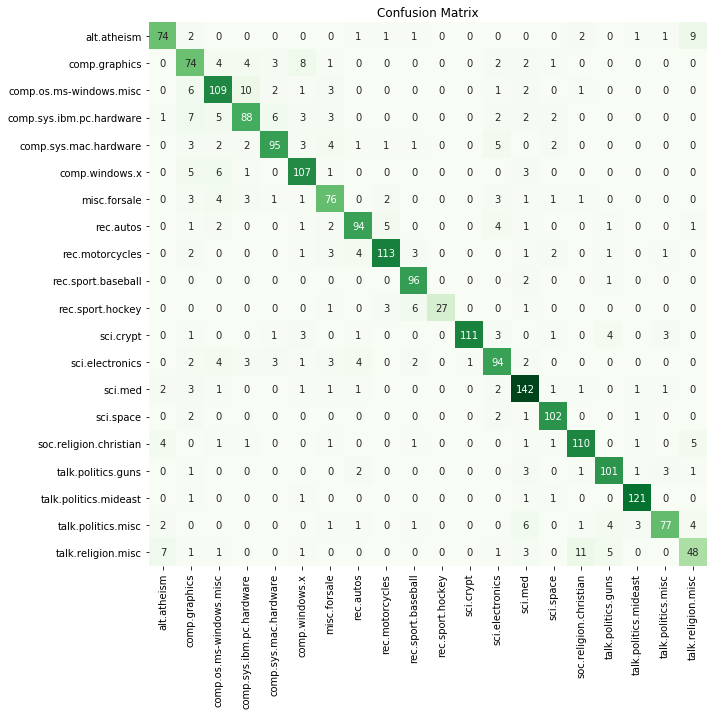

Train score (macro f1):0.9943, test score (macro f1):0.8330


In [27]:
# test classifier with train-test-split
print (colored('Testing classifier with train-test split', 'magenta', attrs=['bold']))
f1 = pipeline.test_classifier(X_train_tfidf, y_train, clr_lr_tfidf, test_size=0.2, y_names=category, confusion=True)
print('Train score (macro f1):%.4f, test score (macro f1):%.4f'%(f1[1],f1[0]))

In [42]:
scores = pipeline.cross_validation(X_train_tfidf, y_train, clf, n_jobs=-1, cv=10)

The average f1_macro score is 0.8313, standard deviation is 0.0102.


In [43]:
scores

array([0.84639087, 0.81811118, 0.84536803, 0.81920869, 0.83235347,
       0.82675883, 0.82029618, 0.83649466, 0.84117849, 0.82702857])

## SVM

In [35]:
# BOW
clf = SGDClassifier(alpha =1e-6, random_state=42)
s = pipeline.cross_validation(X_train_bow, y_train, clf)

# Normallized BOW
clf = SGDClassifier(alpha =1e-5, random_state=42)
s = pipeline.cross_validation(X_train_tfidf,y_train, clf)

# Tf-idf
clf = SGDClassifier(alpha =5e-5, random_state=42)
s = pipeline.cross_validation(X_train_scaled,y_train, clf)

# L1 regularization
clf = SGDClassifier(penalty = 'l1', alpha = 1e-3, random_state=42)
s = pipeline.cross_validation(X_train_tfidf, y_train, clf)

The average f1_macro score is 0.6751, standard deviation is 0.0302.
The average f1_macro score is 0.8103, standard deviation is 0.0080.
The average f1_macro score is 0.7747, standard deviation is 0.0091.
The average f1_macro score is 0.4705, standard deviation is 0.0109.


### SVM+BOW

In [40]:
# grid search
param_grid={'alpha':[1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10]}
clf = SGDClassifier(random_state=42)
scores, clf = pipeline.grid_search(X_train_bow, y_train, clf, param_grid, n_jobs = -1)
print(scores)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    7.6s finished




The best parameter set is {'alpha': 0.01} with score 0.7241.
  param_alpha  mean_test_score  std_test_score  mean_train_score  \
0       1e-06         0.675050        0.030164          0.815126   
1       1e-05         0.699706        0.016599          0.851726   
2      0.0001         0.692125        0.023299          0.832457   
3       0.001         0.669239        0.049859          0.801538   
4        0.01         0.724097        0.032604          0.833903   
5         0.1         0.638513        0.025439          0.694487   
6           1         0.199571        0.034766          0.211477   
7          10         0.012117        0.002404          0.012807   

   std_train_score  
0         0.039854  
1         0.022977  
2         0.023042  
3         0.056295  
4         0.032653  
5         0.016855  
6         0.039032  
7         0.001081  


In [41]:
clf = SGDClassifier(alpha=0.01, random_state=42)
# test classifier with train-test-split
print (colored('Testing logistic regression classifier with train-test split', 'magenta', attrs=['bold']))
f1 = pipeline.test_classifier(X_train_bow, y_train, clf, test_size=0.2, y_names=category, confusion=False,random_state=20)
print('Train score (macro f1):%.4f, test score (macro f1):%.4f'%(f1[1],f1[0]))

Testing logistic regression classifier with train-test split
test size is: 20%
Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.83      0.71      0.77       112
           comp.graphics       0.72      0.70      0.71       125
 comp.os.ms-windows.misc       0.68      0.58      0.63       118
comp.sys.ibm.pc.hardware       0.64      0.65      0.64       129
   comp.sys.mac.hardware       0.76      0.71      0.73       117
          comp.windows.x       0.47      0.88      0.62        97
            misc.forsale       0.67      0.82      0.74       105
               rec.autos       0.92      0.73      0.82       112
         rec.motorcycles       0.95      0.88      0.91       120
      rec.sport.baseball       0.75      0.89      0.82       131
        rec.sport.hockey       1.00      0.05      0.10        37
               sci.crypt       0.74      0.87      0.80       107
         sci.electronics       0.78    

### SVM + Normalized BOW

In [42]:
# grid search
param_grid={'alpha':[1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10]}
clf = SGDClassifier(random_state=42)
scores, clf = pipeline.grid_search(X_train_scaled, y_train, clf, param_grid, n_jobs = -1)
print(scores)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    5.3s finished




The best parameter set is {'alpha': 1e-05} with score 0.7848.
  param_alpha  mean_test_score  std_test_score  mean_train_score  \
0       1e-06         0.775484        0.005764          0.984085   
1       1e-05         0.784836        0.011674          0.959452   
2      0.0001         0.757851        0.006484          0.874494   
3       0.001         0.712396        0.008117          0.805865   
4        0.01         0.344453        0.014630          0.389383   
5         0.1         0.151167        0.024184          0.176096   
6           1         0.008187        0.001017          0.008486   
7          10         0.011702        0.008812          0.012778   

   std_train_score  
0         0.005902  
1         0.006559  
2         0.006141  
3         0.005940  
4         0.017737  
5         0.035011  
6         0.000385  
7         0.010441  


In [43]:
clf = SGDClassifier(alpha=1e-5, random_state=42)
# test classifier with train-test-split
print (colored('Testing logistic regression classifier with train-test split', 'magenta', attrs=['bold']))
f1 = pipeline.test_classifier(X_train_scaled, y_train, clf, test_size=0.2, y_names=category, confusion=False)
print('Train score (macro f1):%.4f, test score (macro f1):%.4f'%(f1[1],f1[0]))

Testing logistic regression classifier with train-test split
test size is: 20%
Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.86      0.67      0.76        92
           comp.graphics       0.78      0.64      0.70        99
 comp.os.ms-windows.misc       0.61      0.87      0.72       135
comp.sys.ibm.pc.hardware       0.80      0.65      0.72       119
   comp.sys.mac.hardware       0.81      0.76      0.79       119
          comp.windows.x       0.95      0.75      0.84       123
            misc.forsale       0.76      0.77      0.77        96
               rec.autos       0.79      0.86      0.82       112
         rec.motorcycles       0.93      0.82      0.87       131
      rec.sport.baseball       0.79      0.97      0.87        99
        rec.sport.hockey       0.82      0.71      0.76        38
               sci.crypt       0.92      0.87      0.89       128
         sci.electronics       0.97    

## SVM + Tf-idf

In [44]:
param_grid={'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100]}
clf = SGDClassifier(penalty = 'l2', random_state=42)
scores, clf = pipeline.grid_search(X_train_tfidf, y_train, clf, param_grid, n_jobs = -1)
print(scores)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.1s finished




The best parameter set is {'alpha': 0.0001} with score 0.8268.
  param_alpha  mean_test_score  std_test_score  mean_train_score  \
0       1e-05         0.810310        0.008045          0.995925   
1      0.0001         0.826813        0.003693          0.969437   
2       0.001         0.773258        0.005545          0.884107   
3        0.01         0.712034        0.007405          0.793986   
4         0.1         0.505497        0.024263          0.549117   
5           1         0.015076        0.010932          0.016910   
6          10         0.020456        0.019131          0.021017   
7         100         0.020456        0.019131          0.021023   

   std_train_score  
0         0.000427  
1         0.000843  
2         0.001949  
3         0.002013  
4         0.017820  
5         0.013254  
6         0.019813  
7         0.019819  


In [29]:
param_grid={'alpha':np.arange(1e-5, 1e-4, 2e-5)}
clf = SGDClassifier(penalty = 'l2', random_state=42)
scores, clf = pipeline.grid_search(X_train_tfidf, y_train, clf, param_grid, n_jobs = -1)
print(scores)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    2.6s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.0s finished




The best parameter set is {'alpha': 5.000000000000001e-05} with score 0.8285.
  param_alpha  mean_test_score  std_test_score  mean_train_score  \
0       1e-05         0.810310        0.008045          0.995925   
1       3e-05         0.825364        0.005636          0.990883   
2       5e-05         0.828477        0.005421          0.984835   
3       7e-05         0.827831        0.004524          0.978670   
4       9e-05         0.826845        0.004345          0.971495   

   std_train_score  
0         0.000427  
1         0.000503  
2         0.000850  
3         0.000546  
4         0.001188  


In [38]:
clf_svm_tfidf = SGDClassifier(penalty = 'l2',alpha = 5e-5, random_state=42)

Testing logistic regression classifier with train-test split
test size is: 40%
Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.75      0.79      0.77       179
           comp.graphics       0.72      0.73      0.72       226
 comp.os.ms-windows.misc       0.74      0.76      0.75       254
comp.sys.ibm.pc.hardware       0.75      0.65      0.69       234
   comp.sys.mac.hardware       0.77      0.72      0.74       254
          comp.windows.x       0.75      0.85      0.80       228
            misc.forsale       0.75      0.83      0.79       219
               rec.autos       0.87      0.86      0.86       238
         rec.motorcycles       0.90      0.87      0.89       230
      rec.sport.baseball       0.91      0.94      0.93       223
        rec.sport.hockey       0.90      0.76      0.82        74
               sci.crypt       0.95      0.88      0.91       240
         sci.electronics       0.77    

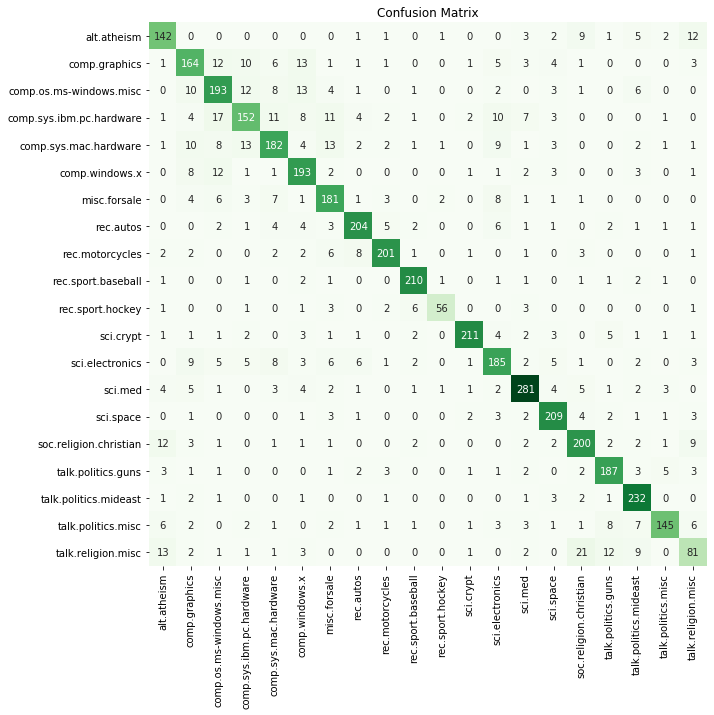

Train score (macro f1):0.9907, test score (macro f1):0.8082


In [39]:
# test classifier with train-test-split
print (colored('Testing logistic regression classifier with train-test split', 'magenta', attrs=['bold']))
f1 = pipeline.test_classifier(X_train_tfidf, y_train, clf_svm_tfidf, test_size=0.4, y_names=category, confusion=True)
print('Train score (macro f1):%.4f, test score (macro f1):%.4f'%(f1[1],f1[0]))